## Zomato Data Analysis Project
##### importing nacessary library


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read Zomato DataFrame

In [2]:
data = pd.read_csv('Zomato_data .csv')
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## Data Cleaning 

#### Check NAN Data

In [3]:
nan_df = data[data.isna().any(axis = 1)]
if not nan_df.empty :
    nan_df.head()
else:
    print("No NaN values found in the dataframe.")

No NaN values found in the dataframe.


#### Remove '/5' from the 'rate' column and convert the result to float

In [4]:
data['rate'] = data['rate'].str.replace('/5', '').astype(float)
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### Question 1: What type of restaurant do the majority of customers order from 

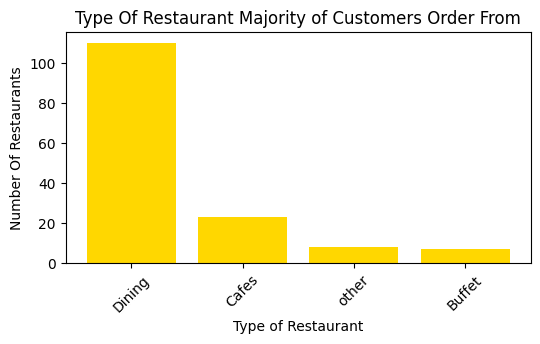

In [5]:
type_of_restaurant = data['listed_in(type)']
restaurant_counts = type_of_restaurant.value_counts()
plt.figure(figsize=(6, 3))
plt.title("Type Of Restaurant Majority of Customers Order From")
plt.xlabel("Type of Restaurant")
plt.ylabel("Number Of Restaurants")
plt.bar(restaurant_counts.index, restaurant_counts.values, color="gold")
plt.xticks(restaurant_counts.index,rotation=45) 
plt.show()

**consultation :** **Dinning** of restaurant do the majority of customers order

### question 2: How many votes has each type of restaurant recived from the customers 

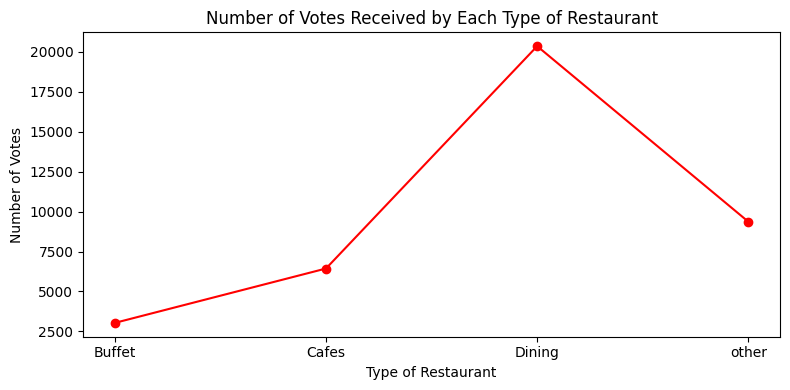

In [6]:
votes_by_restaurant_type = data.groupby('listed_in(type)')['votes'].sum()
plt.figure(figsize=(8, 4))
plt.plot(votes_by_restaurant_type.index, votes_by_restaurant_type.values,marker='o', color='r')
plt.title('Number of Votes Received by Each Type of Restaurant')
plt.xlabel('Type of Restaurant')
plt.ylabel('Number of Votes')
plt.tight_layout() 
plt.show()

**consultation :** Highest Number of Votes Received by **Dinning** Type Restaurant

### question 3: What are the rating that the majority of restaurant have receive 

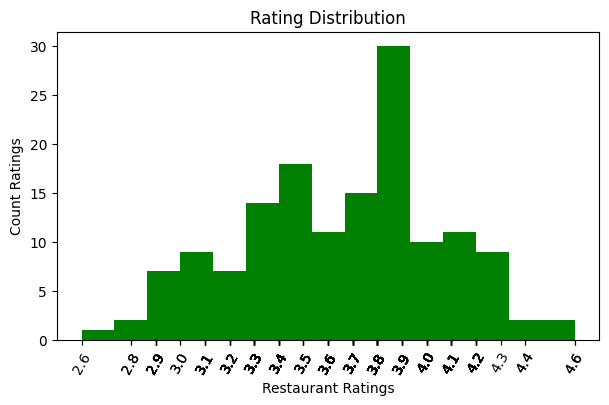

In [7]:
plt.figure(figsize=(7, 4))
plt.hist(data['rate'],bins = 15,color = 'g')
plt.xticks(data['rate'],rotation = 60)
plt.title("Rating Distribution")
plt.xlabel("Restaurant Ratings")
plt.ylabel("Count Ratings")
plt.show()

**consultation :** The Majority Restaurant recives rating from **3.8 to 3.9**

### question 4: Average order spending money from couple👫 

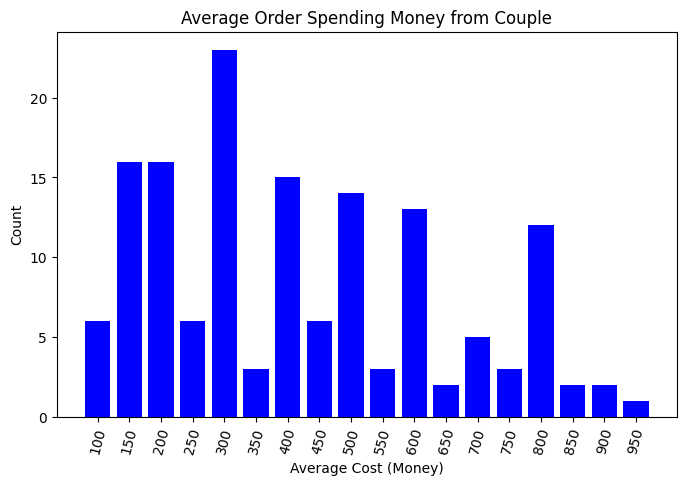

In [8]:
couple_data = data['approx_cost(for two people)']
couple_counts = couple_data.value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.title("Average Order Spending Money from Couple")
plt.xlabel("Average Cost (Money)")
plt.ylabel("Count")
plt.bar(couple_counts.index.astype(str), couple_counts.values, color="b")
plt.xticks(rotation=75)
plt.show()

**consultation :** The Majoriy couple prefer restaurant with an approximate cost **300**

### question 5: Which mode(Online or offline) has recive the maximum rating


C:\Users\Acer\AppData\Local\Temp\ipykernel_7076\4019796418.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Online', 'Offline'])


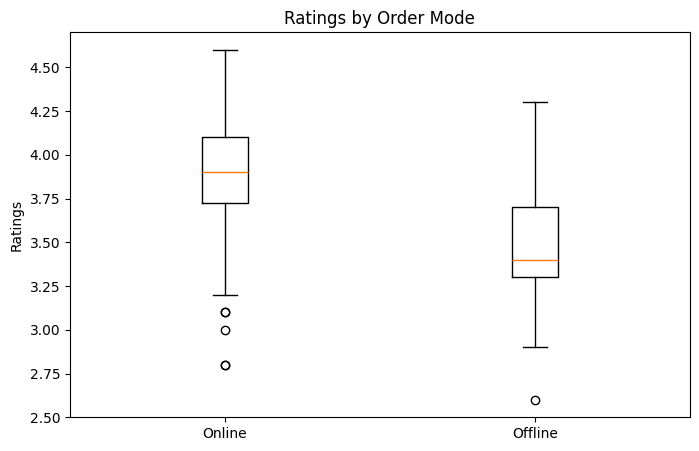

In [9]:
online_ratings = data[data['online_order'] == 'Yes']['rate']
offline_ratings = data[data['online_order'] == 'No']['rate']
data_to_plot = [online_ratings, offline_ratings]
plt.figure(figsize=(8, 5))
plt.boxplot(data_to_plot, labels=['Online', 'Offline'])
plt.ylabel('Ratings')
plt.title('Ratings by Order Mode')
plt.show()

**consultation :** **Online Order** Received highest rating comparison to **Ofline** order

### question 6: Which type of restaurant received more offline order

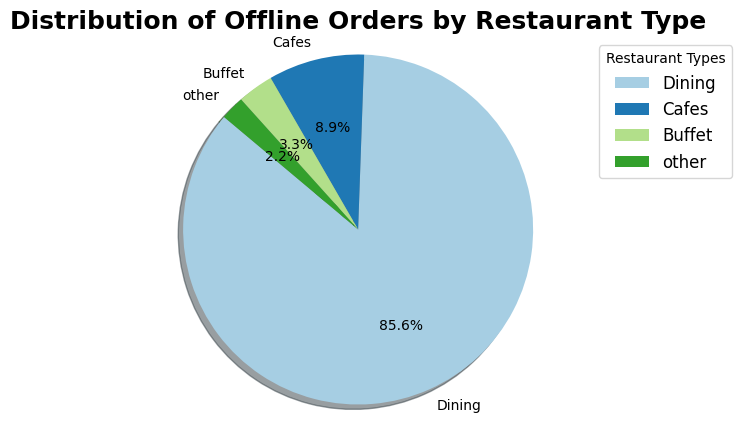

In [10]:
offline = data[data['online_order'] == 'No']
offline_counts = offline['listed_in(type)'].value_counts()
plt.figure(figsize=(6, 5))
plt.pie(
    offline_counts,  
    labels=offline_counts.index,  
    autopct='%1.1f%%',  
    startangle=140, 
    colors=plt.cm.Paired.colors,  
    shadow=True,  
)
plt.title('Distribution of Offline Orders by Restaurant Type', fontsize=18, weight='bold')
plt.axis('equal')  
plt.legend(offline_counts.index, title="Restaurant Types", bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.show()

**consultation :** **Dining** type of restaurant received more offline order